In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 73s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
# Label Description

    # 0 - airplane
    # 1 - automobile
    # 2 - bird
    # 3	- cat
    # 4	- deer
    # 5	- dog
    # 6	- frog
    # 7	- horse
    # 8	- ship
    # 9	- truck

In [8]:
# Reshaping the data to 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
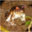

In [10]:
x_train[0]

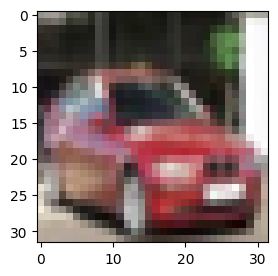

The class label for the image is :  automobile


In [11]:
# sample training image
rdm_img = random.randint(0,len(x_train))
plt.figure(figsize=(10,3))
plt.imshow(x_train[rdm_img])
plt.show()
print('The class label for the image is : ',classes[y_train[rdm_img]])

In [12]:
# function to generate a random imgae
def rdm_sample_img(x,y):
  rdm_img = random.randint(0,len(x))
  plt.figure(figsize=(10,3))
  plt.imshow(x[rdm_img])
  plt.show()
  print('The class label for the image is :',classes[y[rdm_img]])

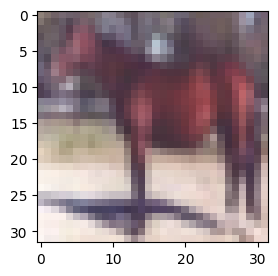

The class label for the image is : horse


In [13]:
rdm_sample_img(x_train,y_train)

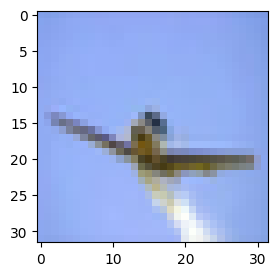

The class label for the image is : airplane


In [14]:
rdm_sample_img(x_test,y_test)

In [15]:
# data scaling
x_train = x_train/255
x_test = x_test/255


In [16]:
# CNN ARCHITECTURE
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
]
)

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])


In [18]:
model.fit(x_train,y_train,validation_split = 0.2,epochs= 10)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3550 - loss: 1.7634 - val_accuracy: 0.5428 - val_loss: 1.2907
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5853 - loss: 1.1692 - val_accuracy: 0.6142 - val_loss: 1.1103
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6487 - loss: 0.9913 - val_accuracy: 0.6332 - val_loss: 1.0433
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6927 - loss: 0.8773 - val_accuracy: 0.6593 - val_loss: 0.9813
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7250 - loss: 0.7806 - val_accuracy: 0.6667 - val_loss: 0.9811
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7544 - loss: 0.6981 - val_accuracy: 0.6795 - val_loss: 0.9345
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7803 - loss: 0.6189 - val_accuracy: 0.6970 - val_loss: 0.9058
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8058 - loss: 0.546

In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6789 - loss: 1.0616


[1.0499635934829712, 0.6815000176429749]

In [20]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
# softmax output fro the first image in the test set
y_pred[0]

array([1.10200963e-05, 1.70676085e-05, 1.31126551e-03, 9.63935256e-01,
       1.13761766e-04, 2.98421308e-02, 4.03803308e-03, 2.87617058e-06,
       7.17293529e-04, 1.12926036e-05], dtype=float32)

In [25]:
# converting the above output to float value
[(round(float(num),4)) for num in y_pred[0]]

[0.0, 0.0, 0.0013, 0.9639, 0.0001, 0.0298, 0.004, 0.0, 0.0007, 0.0]

In [26]:
# converting the highest probability class value into a number
y_class = [np.argmax(ele) for ele in y_pred]
y_class = np.array(y_class)

print('First 10 y_test values: ', (y_test[0:10]))
print('First 10 predicted values: ',y_class[0:10])

First 10 y_test values:  [3 8 8 0 6 6 1 6 3 1]
First 10 predicted values:  [3 8 8 0 4 6 0 6 6 9]


In [27]:
# function for random image validation
def act_to_pred():
  rdm_img = random.randint(0,len(x_test))
  plt.figure(figsize = (10,2))
  plt.imshow(x_test[rdm_img])
  plt.show()
  print('The actual image is: ',classes[y_test[rdm_img]])
  print('The predicted image is : ',classes[y_class[rdm_img]])

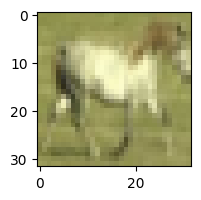

The actual image is:  horse
The predicted image is :  airplane


In [28]:
# comparing the test and prediction class for a random image
act_to_pred()

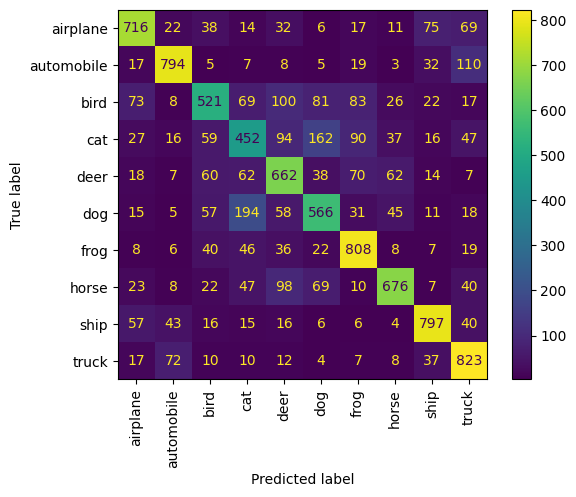

In [29]:
# metric_validation
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_class, display_labels = classes, xticks_rotation = 'vertical')

In [30]:
report = classification_report(y_test, y_class,target_names = classes)
print(report)

              precision    recall  f1-score   support

    airplane       0.74      0.72      0.73      1000
  automobile       0.81      0.79      0.80      1000
        bird       0.63      0.52      0.57      1000
         cat       0.49      0.45      0.47      1000
        deer       0.59      0.66      0.63      1000
         dog       0.59      0.57      0.58      1000
        frog       0.71      0.81      0.75      1000
       horse       0.77      0.68      0.72      1000
        ship       0.78      0.80      0.79      1000
       truck       0.69      0.82      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

